In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('telco.csv')

In [4]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').fillna(0)


In [7]:
features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'PaymentMethod']


In [8]:
X = data[features]
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [9]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ])

In [10]:
X_processed = preprocessor.fit_transform(X)


In [11]:
silhouette_scores = []
K = range(2, 6)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_processed)
    silhouette_scores.append(silhouette_score(X_processed, kmeans.labels_))


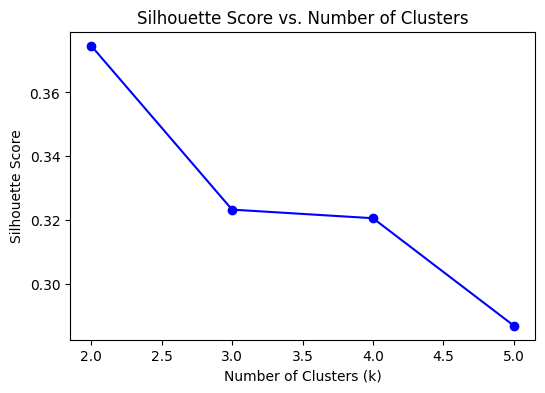

In [12]:
# Plot silhouette scores
plt.figure(figsize=(6, 4))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.savefig('silhouette_plot.png')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_processed)

In [14]:
data['Cluster'] = clusters


In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='tenure', y='MonthlyCharges', hue='Cluster', palette='deep')
plt.title('Customer Segments by Tenure and Monthly Charges')
plt.savefig('cluster_plot.png')
plt.show()

In [17]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
print(data.groupby('Cluster')[numeric_cols].mean())

            tenure  MonthlyCharges  TotalCharges
Cluster                                         
0        28.597523       27.850022    801.741995
1        58.821527       89.672654   5269.542847
2        13.593942       75.996683   1068.805176


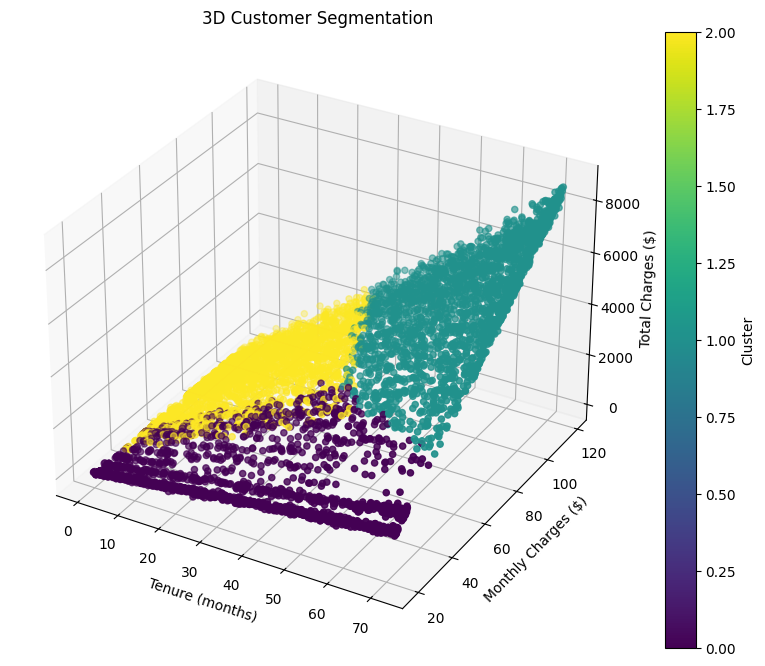

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['tenure'], data['MonthlyCharges'], data['TotalCharges'], c=data['Cluster'], cmap='viridis')
ax.set_xlabel('Tenure (months)')
ax.set_ylabel('Monthly Charges ($)')
ax.set_zlabel('Total Charges ($)')
plt.title('3D Customer Segmentation')
plt.colorbar(scatter, label='Cluster')
plt.savefig('3d_cluster_plot.png')
plt.show()